In [0]:
import os

Data Source : https://github.com/CSSEGISandData/COVID-19

In [0]:
import pandas as pd
import numpy as np

In [0]:
confirmed_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118


In [5]:
deaths_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5


In [6]:
recovered_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,493,499,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41


In [0]:
from datetime import datetime

def convert_date_str(df,n):
    try:
        df.columns = list(df.columns[:n]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[n:]]
    except:
        print('_convert_date_str failed with %y, try %Y')
        df.columns = list(df.columns[:n]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[n:]]

In [0]:
convert_date_str(deaths_global_df,4)

In [0]:
convert_date_str(confirmed_global_df,4)

In [0]:
convert_date_str(recovered_global_df,4)

In [0]:
# Filter out problematic data points (The West Bank and Gaza had a negative value, cruise ships were associated with Canada, etc.)
removed_states = "Recovered|Grand Princess|Diamond Princess"
removed_countries = "US|The West Bank and Gaza"

confirmed_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)
deaths_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)
recovered_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)

In [0]:
#confirmed_global_df['Province_State'].str.match('Recovered|Grand Princess|Diamond Princess')

In [0]:
confirmed_global_df = confirmed_global_df[~confirmed_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
deaths_global_df    = deaths_global_df[~deaths_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
recovered_global_df = recovered_global_df[~recovered_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]

In [14]:
confirmed_global_df.Country_Region.value_counts()

China                   33
Canada                  12
United Kingdom          11
France                  11
Australia                8
                        ..
Trinidad and Tobago      1
Dominican Republic       1
Nicaragua                1
United Arab Emirates     1
Benin                    1
Name: Country_Region, Length: 188, dtype: int64

In [0]:
confirmed_global_df = confirmed_global_df[~confirmed_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
deaths_global_df    = deaths_global_df[~deaths_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
recovered_global_df = recovered_global_df[~recovered_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]

In [0]:
confirmed_global_df.rename(columns={'Long_':'Long'},inplace=True)

In [0]:
confirmed_global_melt_df = confirmed_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=confirmed_global_df.columns[4:], var_name='Date', value_name='ConfirmedCases')

In [0]:
deaths_global_melt_df = deaths_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=deaths_global_df.columns[4:], var_name='Date', value_name='Deaths')

In [0]:
recovered_global_melt_df = recovered_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=recovered_global_df.columns[4:], var_name='Date', value_name='Recovered')

In [20]:
deaths_global_melt_df.head(5)

,Country_Region,Province_State,Lat,Long,Date,Deaths
0,Afghanistan,NaN,33.0000,65.0000,2020-01-22,0
1,Albania,NaN,41.1533,20.1683,2020-01-22,0
2,Algeria,NaN,28.0339,1.6596,2020-01-22,0
3,Andorra,NaN,42.5063,1.5218,2020-01-22,0
4,Angola,NaN,-11.2027,17.8739,2020-01-22,0


In [21]:
confirmed_global_melt_df.head()

,Country_Region,Province_State,Lat,Long,Date,ConfirmedCases
0,Afghanistan,NaN,33.0000,65.0000,2020-01-22,0
1,Albania,NaN,41.1533,20.1683,2020-01-22,0
2,Algeria,NaN,28.0339,1.6596,2020-01-22,0
3,Andorra,NaN,42.5063,1.5218,2020-01-22,0
4,Angola,NaN,-11.2027,17.8739,2020-01-22,0


In [22]:
train = confirmed_global_melt_df.merge(deaths_global_melt_df, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])
train.head()

,Country_Region,Province_State,Lat,Long,Date,ConfirmedCases,Deaths
0,Afghanistan,NaN,33.0000,65.0000,2020-01-22,0,0
1,Albania,NaN,41.1533,20.1683,2020-01-22,0,0
2,Algeria,NaN,28.0339,1.6596,2020-01-22,0,0
3,Andorra,NaN,42.5063,1.5218,2020-01-22,0,0
4,Angola,NaN,-11.2027,17.8739,2020-01-22,0,0


In [23]:
train = train.merge(recovered_global_melt_df, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])
train.head()

,Country_Region,Province_State,Lat,Long,Date,ConfirmedCases,Deaths,Recovered
0,Afghanistan,NaN,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,NaN,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,NaN,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,NaN,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,NaN,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
train.rename({'Country_Region': 'country', 'Province_State': 'province', 'Id': 'id', 'Date': 'date', 'ConfirmedCases': 'confirmed', 'Deaths': 'fatalities', 'Recovered': 'recovered'}, axis=1, inplace=True)

In [0]:
train['country_province'] = train['country'].fillna('') + '/' + train['province'].fillna('')

In [26]:
train.head()

,country,province,Lat,Long,date,confirmed,fatalities,recovered,country_province
0,Afghanistan,NaN,33.0000,65.0000,2020-01-22,0,0,0,Afghanistan/
1,Albania,NaN,41.1533,20.1683,2020-01-22,0,0,0,Albania/
2,Algeria,NaN,28.0339,1.6596,2020-01-22,0,0,0,Algeria/
3,Andorra,NaN,42.5063,1.5218,2020-01-22,0,0,0,Andorra/
4,Angola,NaN,-11.2027,17.8739,2020-01-22,0,0,0,Angola/


In [27]:
ww_df = train.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
ww_df['new_case'] = ww_df['confirmed'] - ww_df['confirmed'].shift(1)
ww_df['growth_factor'] = ww_df['new_case'] / ww_df['new_case'].shift(1)
ww_df.tail()

,date,confirmed,fatalities,new_case,growth_factor
137,2020-06-07,4946669,283639,93812.0,0.911548
138,2020-06-08,5031600,286851,84931.0,0.905332
139,2020-06-09,5135951,290691,104351.0,1.228656
140,2020-06-10,5231841,294449,95890.0,0.918918
141,2020-06-11,5362528,298766,130687.0,1.362885


In [28]:
ww_melt_df = pd.melt(ww_df, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])
ww_melt_df.head()

,date,variable,value
0,2020-01-22,confirmed,539.0
1,2020-01-23,confirmed,628.0
2,2020-01-24,confirmed,901.0
3,2020-01-25,confirmed,1347.0
4,2020-01-26,confirmed,1958.0


In [29]:
import plotly.express as px
fig = px.line(ww_melt_df, x="date", y="value", color='variable', 
              title="Worldwide Confirmed/Death Cases Over Time")
fig.show()

In [30]:
fig = px.line(ww_melt_df, x="date", y="value", color='variable',
              title="Worldwide Confirmed/Death Cases Over Time (Log scale)",
             log_y=True)
fig.show()

In [31]:
ww_df['mortality'] = ww_df['fatalities'] / ww_df['confirmed']

fig = px.line(ww_df, x="date", y="mortality", 
              title="Worldwide Mortality Rate Over Time")
fig.show()

**Growth Factor:**

Growth factor is the factor by which a quantity multiplies itself over time. The formula used is every day's new cases / new cases on the previous day.

When this number is more than 1. the number of confirmed cases will be increasing, and when it keeps below 1. the number of confirmed cases will decrease.

In [32]:
import plotly.graph_objects as go
fig = px.line(ww_df, x="date", y="growth_factor", 
              title="Worldwide Growth Factor Over Time")
fig.add_trace(go.Scatter(x=[ww_df['date'].min(), ww_df['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

**CountryWise Visualization**

In [33]:
country_df = train.groupby(['date', 'country'])[['confirmed', 'fatalities']].sum().reset_index()
country_df.tail()

,date,country,confirmed,fatalities
24987,2020-06-11,Vietnam,332,0
24988,2020-06-11,West Bank and Gaza,487,3
24989,2020-06-11,Western Sahara,9,1
24990,2020-06-11,Zambia,1200,10
24991,2020-06-11,Zimbabwe,332,4


In [34]:
countries = country_df['country'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

176 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Denmark'
 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kaza

In [35]:
target_date = country_df['date'].max()

print('Date: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(country_df.query('(date == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Date:  2020-06-11
176 countries have more than 1 confirmed cases
172 countries have more than 10 confirmed cases
154 countries have more than 100 confirmed cases
114 countries have more than 1000 confirmed cases
57 countries have more than 10000 confirmed cases


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



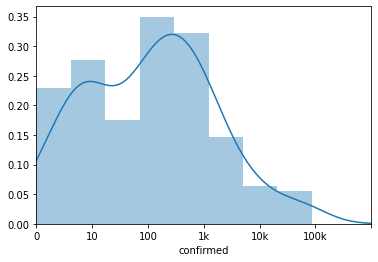

In [36]:
import seaborn as sns
ax = sns.distplot(np.log10(country_df.query('date == "2020-03-27"')['confirmed'] + 1))
ax.set_xlim([0, 6])
ax.set_xticks(np.arange(7))
_ = ax.set_xticklabels(['0', '10', '100', '1k', '10k', '100k'])

In [0]:
top_country_df = country_df.query('(date == @target_date) & (confirmed > 1000)').sort_values('confirmed', ascending=False)
top_country_melt_df = pd.melt(top_country_df, id_vars='country', value_vars=['confirmed', 'fatalities'])

In [38]:
top_country_melt_df.head()

,country,variable,value
0,Brazil,confirmed,802828
1,Russia,confirmed,501800
2,India,confirmed,297535
3,United Kingdom,confirmed,292860
4,Spain,confirmed,242707


In [39]:
fig = px.bar(top_country_melt_df.iloc[::-1],
             x='value', y='country', color='variable', barmode='group',
             title=f'Confirmed Cases/Deaths on {target_date}', text='value', height=1500, orientation='h')
fig.show()

In [40]:
top30_countries = top_country_df.sort_values('confirmed', ascending=False).iloc[:30]['country'].unique()
top30_countries_df = country_df[country_df['country'].isin(top30_countries)]
fig = px.line(top30_countries_df,
              x='date', y='confirmed', color='country',
              title=f'Confirmed Cases for top 30 country as of {target_date}')
fig.show()

In [41]:
top30_countries = top_country_df.sort_values('fatalities', ascending=False).iloc[:30]['country'].unique()
top30_countries_df = country_df[country_df['country'].isin(top30_countries)]
fig = px.line(top30_countries_df,
              x='date', y='fatalities', color='country',
              title=f'Fatalities for top 30 country as of {target_date}')
fig.show()

**Mortality rate by country**

In [42]:
top_country_df = country_df.query('(date == @target_date) & (confirmed > 100)')
top_country_df['mortality_rate'] = top_country_df['fatalities'] / top_country_df['confirmed']
top_country_df = top_country_df.sort_values('mortality_rate', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
top_country_df.head()

,date,country,confirmed,fatalities,mortality_rate
24832,2020-06-11,Belgium,59711,9636,0.161377
24875,2020-06-11,France,192493,29349,0.152468
24897,2020-06-11,Italy,236142,34167,0.144688
24983,2020-06-11,United Kingdom,292860,41364,0.141242
24889,2020-06-11,Hungary,4039,553,0.136915


In [44]:
fig = px.bar(top_country_df[:30].iloc[::-1],
             x='mortality_rate', y='country',
             title=f'Mortality rate HIGH: top 30 countries on {target_date}', text='mortality_rate', height=800, orientation='h')
fig.show()

In [45]:
fig = px.bar(top_country_df[-30:],
             x='mortality_rate', y='country',
             title=f'Mortality rate LOW: top 30 countries on {target_date}', text='mortality_rate', height=800, orientation='h')
fig.show()

**Geo Map visulization**

In [46]:
all_country_df = country_df.query('date == @target_date')
all_country_df['confirmed_log1p'] = np.log10(all_country_df['confirmed'] + 1)
all_country_df['fatalities_log1p'] = np.log10(all_country_df['fatalities'] + 1)
all_country_df['mortality_rate'] = all_country_df['fatalities'] / all_country_df['confirmed']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [47]:
all_country_df.head()

,date,country,confirmed,fatalities,confirmed_log1p,fatalities_log1p,mortality_rate
24816,2020-06-11,Afghanistan,22890,426,4.359665,2.630428,0.018611
24817,2020-06-11,Albania,1385,35,3.141763,1.556303,0.025271
24818,2020-06-11,Algeria,10589,741,4.024896,2.870404,0.069978
24819,2020-06-11,Andorra,852,51,2.930949,1.716003,0.059859
24820,2020-06-11,Angola,118,5,2.075547,0.778151,0.042373


In [48]:
fig = px.choropleth(all_country_df, locations="country", 
                    locationmode='country names', color="confirmed_log1p", 
                    hover_name="country", hover_data=["confirmed", 'fatalities', 'mortality_rate'],
                    range_color=[all_country_df['confirmed_log1p'].min(), all_country_df['confirmed_log1p'].max()], 
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')

# I'd like to update colorbar to show raw values, but this does not work somehow...
# Please let me know if you know how to do this!!
trace1 = list(fig.select_traces())[0]
trace1.colorbar = go.choropleth.ColorBar(
    tickvals=[0, 1, 2, 3, 4, 5],
    ticktext=['1', '10', '100', '1000','10000', '10000'])
fig.show()

In [49]:
fig = px.choropleth(all_country_df, locations="country", 
                    locationmode='country names', color="fatalities_log1p", 
                    hover_name="country", range_color=[0, 4],
                    hover_data=['confirmed', 'fatalities', 'mortality_rate'],
                    color_continuous_scale="peach", 
                    title='Countries with fatalities')
fig.show()

In [50]:
fig = px.choropleth(all_country_df, locations="country", 
                    locationmode='country names', color="mortality_rate", 
                    hover_name="country", range_color=[0, 0.12], 
                    color_continuous_scale="peach", 
                    title='Countries with mortality rate')
fig.show()


**Daily NEW confirmed cases trend**

In [51]:
country_df['prev_confirmed'] = country_df.groupby('country')['confirmed'].shift(1)
country_df['new_case'] = country_df['confirmed'] - country_df['prev_confirmed']
country_df['new_case'].fillna(0, inplace=True)
top30_country_df = country_df[country_df['country'].isin(top30_countries)]

fig = px.line(top30_country_df,
              x='date', y='new_case', color='country',
              title=f'DAILY NEW Confirmed cases by country')
fig.show()

In [52]:
country_df['prev_new_case'] = country_df.groupby('country')['new_case'].shift(1)
country_df['growth_factor'] = country_df['new_case'] / country_df['prev_new_case']
country_df['growth_factor'].fillna(0, inplace=True)
top30_country_df = country_df[country_df['country'].isin(top30_countries)]

fig = px.line(top30_country_df,
              x='date', y='growth_factor', color='country',
              title=f'Growth factor by country')
fig.add_trace(go.Scatter(x=[ww_df['date'].min(), ww_df['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

**Geographical animation: spready by date**

In [53]:
country_df['confirmed_log1p'] = np.log1p(country_df['confirmed'])
country_df['fatalities_log1p'] = np.log1p(country_df['fatalities'])

fig = px.scatter_geo(country_df, locations="country", locationmode='country names', 
                     color="confirmed", size='confirmed', hover_name="country", 
                     hover_data=['confirmed', 'fatalities'],
                     range_color= [0, country_df['confirmed'].max()], 
                     projection="natural earth", animation_frame="date", 
                     title='COVID-19: Confirmed cases spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [54]:
india_df = train[train['country']=='India']
india_df.reset_index(drop=True)

,country,province,Lat,Long,date,confirmed,fatalities,recovered,country_province
0,India,NaN,21.0,78.0,2020-01-22,0,0,0,India/
1,India,NaN,21.0,78.0,2020-01-23,0,0,0,India/
2,India,NaN,21.0,78.0,2020-01-24,0,0,0,India/
3,India,NaN,21.0,78.0,2020-01-25,0,0,0,India/
4,India,NaN,21.0,78.0,2020-01-26,0,0,0,India/
...,...,...,...,...,...,...,...,...,...
137,India,NaN,21.0,78.0,2020-06-07,257486,7207,123848,India/
138,India,NaN,21.0,78.0,2020-06-08,265928,7473,129095,India/
139,India,NaN,21.0,78.0,2020-06-09,276146,7750,134670,India/
140,India,NaN,21.0,78.0,2020-06-10,276583,7745,135206,India/


In [55]:
in_df = india_df.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
in_df['new_case'] = in_df['confirmed'] - in_df['confirmed'].shift(1)
in_df['growth_factor'] = in_df['new_case'] / in_df['new_case'].shift(1)
in_df.tail()

,date,confirmed,fatalities,new_case,growth_factor
137,2020-06-07,257486,7207,10864.0,1.040812
138,2020-06-08,265928,7473,8442.0,0.777062
139,2020-06-09,276146,7750,10218.0,1.210377
140,2020-06-10,276583,7745,437.0,0.042768
141,2020-06-11,297535,8498,20952.0,47.945080


In [56]:
in_melt_df = pd.melt(in_df, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])
in_melt_df.head()

,date,variable,value
0,2020-01-22,confirmed,0.0
1,2020-01-23,confirmed,0.0
2,2020-01-24,confirmed,0.0
3,2020-01-25,confirmed,0.0
4,2020-01-26,confirmed,0.0


In [57]:
fig = px.line(in_melt_df, x="date", y="value", color='variable', 
              title="India Confirmed/Death Cases Over Time")
fig.show()

In [58]:
fig = px.line(in_melt_df, x="date", y="value", color='variable',
              title="India Confirmed/Death Cases Over Time (Log scale)",
             log_y=True)
fig.show()

In [59]:
in_df['mortality'] = in_df['fatalities'] / in_df['confirmed']

fig = px.line(in_df, x="date", y="mortality", 
              title="India Mortality Rate Over Time")
fig.show()

In [60]:
fig = px.line(in_df, x="date", y="growth_factor", 
              title="India Growth Factor Over Time")
fig.add_trace(go.Scatter(x=[ww_df['date'].min(), ww_df['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()